In [1]:
import pandas as pd
from tensorflow import keras
from keras.models import *
from keras.layers import *
import tensorflow.keras.utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
from numpy import argmax
from keras import datasets
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tensorflow'

In [7]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

NameError: name 'datasets' is not defined

In [3]:
cifar=datasets.cifar10.load_data()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
(x_train.shape,x_test.shape)

((35000, 32, 32, 3), (10000, 32, 32, 3))

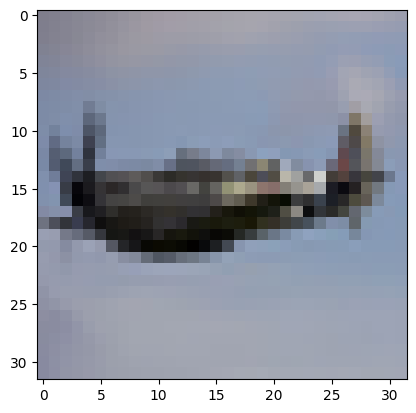

In [7]:
plt.imshow(x_train[20],cmap='gray')

In [8]:
y_train[20]

array([0], dtype=uint8)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten, Dense, Input

CNN_mnist = Sequential()
CNN_mnist.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
CNN_mnist.add(Conv2D(32, (3, 3), activation='relu'))
CNN_mnist.add(MaxPooling2D(pool_size=(2, 2)))
CNN_mnist.add(Dropout(0.25))
CNN_mnist.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_mnist.add(Conv2D(64, (3, 3), activation='relu'))
CNN_mnist.add(MaxPooling2D(pool_size=(2, 2)))
CNN_mnist.add(Dropout(0.25))
CNN_mnist.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_mnist.add(Conv2D(64, (3, 3), activation='relu'))
CNN_mnist.add(MaxPooling2D(pool_size=(2, 2)))
CNN_mnist.add(Dropout(0.25))
CNN_mnist.add(Flatten())
CNN_mnist.add(Dense(84, activation='relu'))
CNN_mnist.add(Dropout(0.5))
CNN_mnist.add(Dense(10, activation='softmax'))

CNN_mnist.summary()
CNN_mnist.summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x796833134310>>

In [ ]:
CNN_mnist.compile(loss='sparse_categorical_crossentropy', optimizer ='Adam',metrics=['accuracy'])
var=CNN_mnist.fit(x_train,y_train,epochs=1,verbose=2,validation_data=(x_val,y_val),callbacks=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True))

In [ ]:
score_train=CNN_mnist.evaluate(x_train,y_train)


In [ ]:
score_test= CNN_mnist.evaluate(x_test,y_test)

In [ ]:
y_predict=CNN_mnist.predict(x_test)
y_predict.shape

In [ ]:
import numpy as np
from numpy import argmax
y_predict1=argmax(y_predict,axis=1)

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(y_test[0])
print(y_predict[0])
print(y_predict1[0])


In [ ]:
ANN_mnist.save('mnist.Neural')

In [ ]:
import tensorflow.keras.utils
from tensorflow.keras.utils import load_img, img_to_array
image=load_img("/content/sample_image.webp",target_size=(28,28))
image

In [ ]:
image.size

In [ ]:
image=image.convert('L')

In [ ]:
image=img_to_array(image)
image.shape

In [ ]:
image=image/255

In [ ]:
plt.imshow(x_test[0],cmap='gray')

In [ ]:

import cv2
import numpy as np


model = load_model('mnist.Neural')

image = cv2.imread('/content/sample_image.webp', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)



In [ ]:
predictions = model.predict(image)

predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)